In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [3]:
cust = pd.read_csv(r'C:\Users\Rida\Downloads\customers.csv')
prod = pd.read_csv(r'C:\Users\Rida\Downloads\product.csv')#,header=true)

In [4]:
cust.head()

,CustomerId,Date
0,1,1/1/2018
1,2,1/1/2018
2,3,1/1/2018
3,4,1/1/2018
4,5,1/1/2018


In [5]:
prod.head()

,CustomerId,Product,Product_StartDate,Product_EndDate
0,1,1,1/1/2018,1/1/2019
1,1,1,1/1/2019,1/1/2020
2,1,2,1/1/2020,7/1/2020
3,1,2,7/1/2020,1/1/2021
4,1,2,1/1/2021,12/31/9999


<AxesSubplot:>

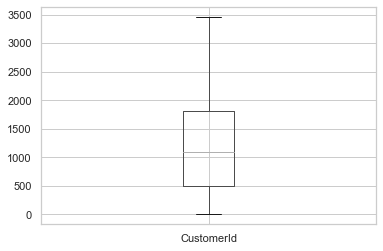

In [519]:
cust.boxplot()

<AxesSubplot:>

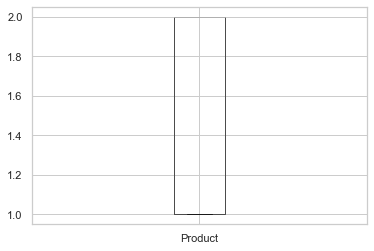

In [522]:
prod[["Product"]].boxplot()

In [518]:
cust.dtypes

CustomerId             int64
Date          datetime64[ns]
dtype: object

In [7]:
prod.dtypes

CustomerId            int64
Product               int64
Product_StartDate    object
Product_EndDate      object
dtype: object

In [57]:
##cust.Date = cust.Date.dt.strftime('%m-%d-%Y')

In [8]:
cust.Date = pd.to_datetime(cust.Date) 

In [9]:
prod.Product_StartDate = pd.to_datetime(prod.Product_StartDate) 

In [10]:
prod.Product_EndDate = pd.to_datetime(prod.Product_EndDate, errors = 'ignore') 

#### 1. Has Gas South’s customer count over time increased or decreased since 2018? How many customers do we have as of January 1st, 2021?

In [11]:
customer_count_over_time = cust.groupby('Date').size().reset_index(name='CustomerCount')

In [13]:
customer_count_over_time.head(40)

,Date,CustomerCount
0,2018-01-01,100
1,2018-02-01,190
2,2018-03-01,277
3,2018-04-01,343
4,2018-05-01,400
5,2018-06-01,462
6,2018-07-01,532
7,2018-08-01,600
8,2018-09-01,658
9,2018-10-01,750


<AxesSubplot:xlabel='Date'>

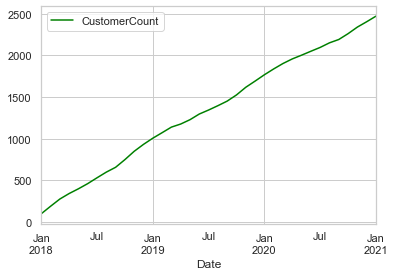

In [532]:
customer_count_over_time.plot(y="CustomerCount", x="Date", kind="line", color="green")

In [20]:
customer_count_over_time.where(customer_count_over_time["Date"]=='2021-01-01').dropna()

,Date,CustomerCount
36,2021-01-01,2471.0


#### 2. How has our customer portfolio mix changed over time? Please show a graph of our customers’ product distribution over time.

In [23]:
prod.head(10)

,CustomerId,Product,Product_StartDate,Product_EndDate
0,1,1,2018-01-01,1/1/2019
1,1,1,2019-01-01,1/1/2020
2,1,2,2020-01-01,7/1/2020
3,1,2,2020-07-01,1/1/2021
4,1,2,2021-01-01,12/31/9999
5,2,2,2018-01-01,7/1/2018
6,2,1,2018-07-01,7/1/2019
7,2,2,2019-07-01,1/1/2020
8,2,2,2020-01-01,7/1/2020
9,2,1,2020-07-01,12/31/9999


In [61]:
prod.groupby(["Product","Product_StartDate"]).size().reset_index(name='Count').sort_values('Product_StartDate').tail(20)

,Product,Product_StartDate,Count
64,2,2020-04-01,156
27,1,2020-04-01,107
65,2,2020-05-01,158
28,1,2020-05-01,114
66,2,2020-06-01,147
29,1,2020-06-01,113
67,2,2020-07-01,169
30,1,2020-07-01,129
31,1,2020-08-01,145
68,2,2020-08-01,168


In [234]:
# Create a DataFrame
df = prod.groupby(["Product","Product_StartDate"]).size().reset_index(name='Count').sort_values('Product_StartDate')
#df
# Convert date columns to datetime
df['Product_StartDate'] = pd.to_datetime(df['Product_StartDate'])
#df
# Grouping by quarters and summing counts for each product
df['Quarter'] = df['Product_StartDate'].dt.to_period('Q').astype('str')

df['Quarter'] = df['Quarter'].str[:4] + ' ' + df['Quarter'].str[4:]

quarterly_sum = df.groupby('Quarter')['Count'].sum()









In [235]:
quarterly_sum


Quarter
2018 Q1    294
2018 Q2    226
2018 Q3    362
2018 Q4    395
2019 Q1    575
2019 Q2    504
2019 Q3    640
2019 Q4    697
2020 Q1    829
2020 Q2    795
2020 Q3    904
2020 Q4    988
2021 Q1    351
Name: Count, dtype: int64

In [236]:
#prod.groupby(["Prot","Product_StartDate"]).size().reset_index(name='Count').sort_values('Product_StartDate').head(6).sum()


df.groupby(["Quarter","Product"]).sum()

Count
Quarter Product       
2018 Q1 1          137
        2          157
2018 Q2 1          128
        2           98
2018 Q3 1          160
        2          202
2018 Q4 1          186
        2          209
2019 Q1 1          255
        2          320
2019 Q2 1          229
        2          275
2019 Q3 1          285
        2          355
2019 Q4 1          294
        2          403
2020 Q1 1          373
        2          456
2020 Q2 1          334
        2          461
2020 Q3 1          400
        2          504
2020 Q4 1          446
        2          542
2021 Q1 1          156
        2          195

In [237]:
product_distribution

Count     
Product     1    2
Quarter           
2018Q1    137  157
2018Q2    128   98
2018Q3    160  202
2018Q4    186  209
2019Q1    255  320
2019Q2    229  275
2019Q3    285  355
2019Q4    294  403
2020Q1    373  456
2020Q2    334  461
2020Q3    400  504
2020Q4    446  542
2021Q1    156  195

In [256]:
df_new4.columns

MultiIndex([('Quarter', ''),
            (  'Count',  1),
            (  'Count',  2)],
           names=[None, 'Product'])

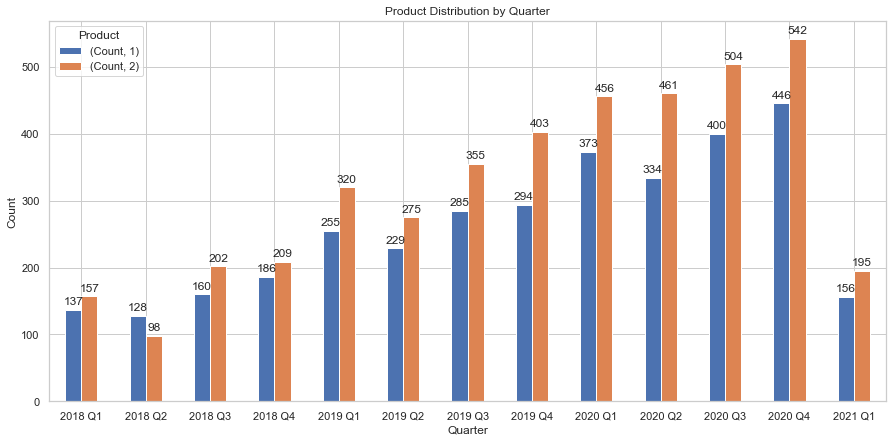

In [261]:
import matplotlib.pyplot as plt

# Your existing code to create and plot the bar chart
product_distribution = df.groupby(['Quarter', 'Product']).sum().unstack()

# Plotting the bar chart
ax = product_distribution.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Quarter')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.title('Product Distribution by Quarter')
plt.legend(title='Product')

df_new4 = product_distribution.reset_index()

# Adding text labels on top of the stacked bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.show()


In [124]:
prod.where(prod.Product==1).groupby(['Product_StartDate']).count()

,CustomerId,Product,Product_EndDate
Product_StartDate,,,
2018-01-01,50,50,50
2018-02-01,40,40,40
2018-03-01,47,47,47
2018-04-01,45,45,45
2018-05-01,37,37,37
2018-06-01,46,46,46
2018-07-01,55,55,55
2018-08-01,52,52,52
2018-09-01,53,53,53


#### 3. How many new customers (enrollments) do we have every month? 

In [534]:
df3 = cust.groupby('Date').count().diff().reset_index().fillna(100)
df3['Date'] = df3['Date'].dt.to_period('M').dt.strftime('%b-%Y')

In [546]:
df3 = df3.rename(columns={"CustomerId":"Customer Count"})

In [547]:
df3

,Date,Customer Count
0,Jan-2018,100.0
1,Feb-2018,90.0
2,Mar-2018,87.0
3,Apr-2018,66.0
4,May-2018,57.0
5,Jun-2018,62.0
6,Jul-2018,70.0
7,Aug-2018,68.0
8,Sep-2018,58.0
9,Oct-2018,92.0


<AxesSubplot:xlabel='New Enrollments', ylabel='Date'>

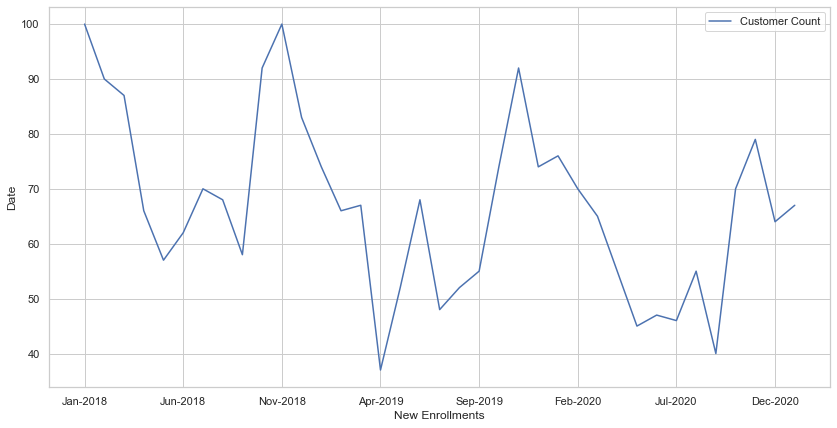

In [556]:
df3.plot(x = "Date", y="Customer Count", kind="line", figsize=(14,7), xlabel="New Enrollments", ylabel="Date")

#### 4. Please forecast the number of enrollments that we anticipate for the remainder of 2021. Show the forecast broken out by month and graphically display how this compares with historical numbers. Please explain the methodology (at high level) and why you chose the method for the forecast. 

In [664]:
df4 = cust.groupby('Date').count().diff().reset_index().fillna(100)
#df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4.set_index("Date")
#df4 = df4.index.freq = "M"
#df4.index = df4.index.to_period('M').asfreq('M')
#df4 = df4.index.freq = "D"

In [665]:
df4 = df4.rename(columns = {"CustomerId":"Enrollments"})

In [666]:
df4.dtypes

Enrollments    float64
dtype: object

In [667]:
df4.head(10)

,Enrollments
Date,
2018-01-01,100.0
2018-02-01,90.0
2018-03-01,87.0
2018-04-01,66.0
2018-05-01,57.0
2018-06-01,62.0
2018-07-01,70.0
2018-08-01,68.0
2018-09-01,58.0


<AxesSubplot:>

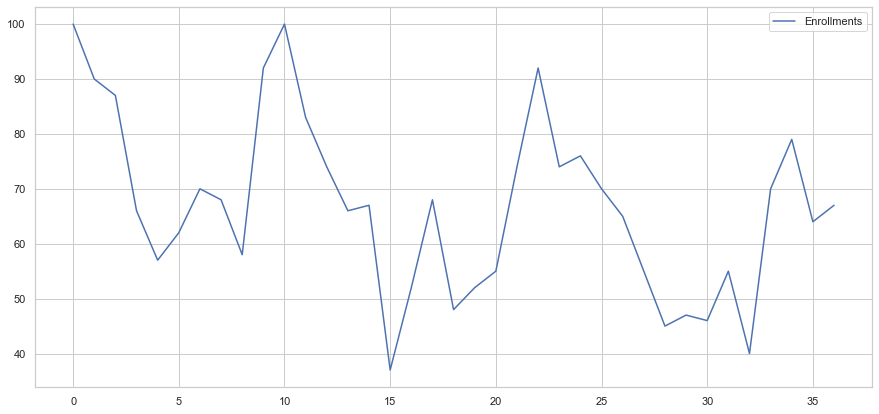

In [579]:
df4.plot(kind="line", y="Enrollments", figsize=(15,7))

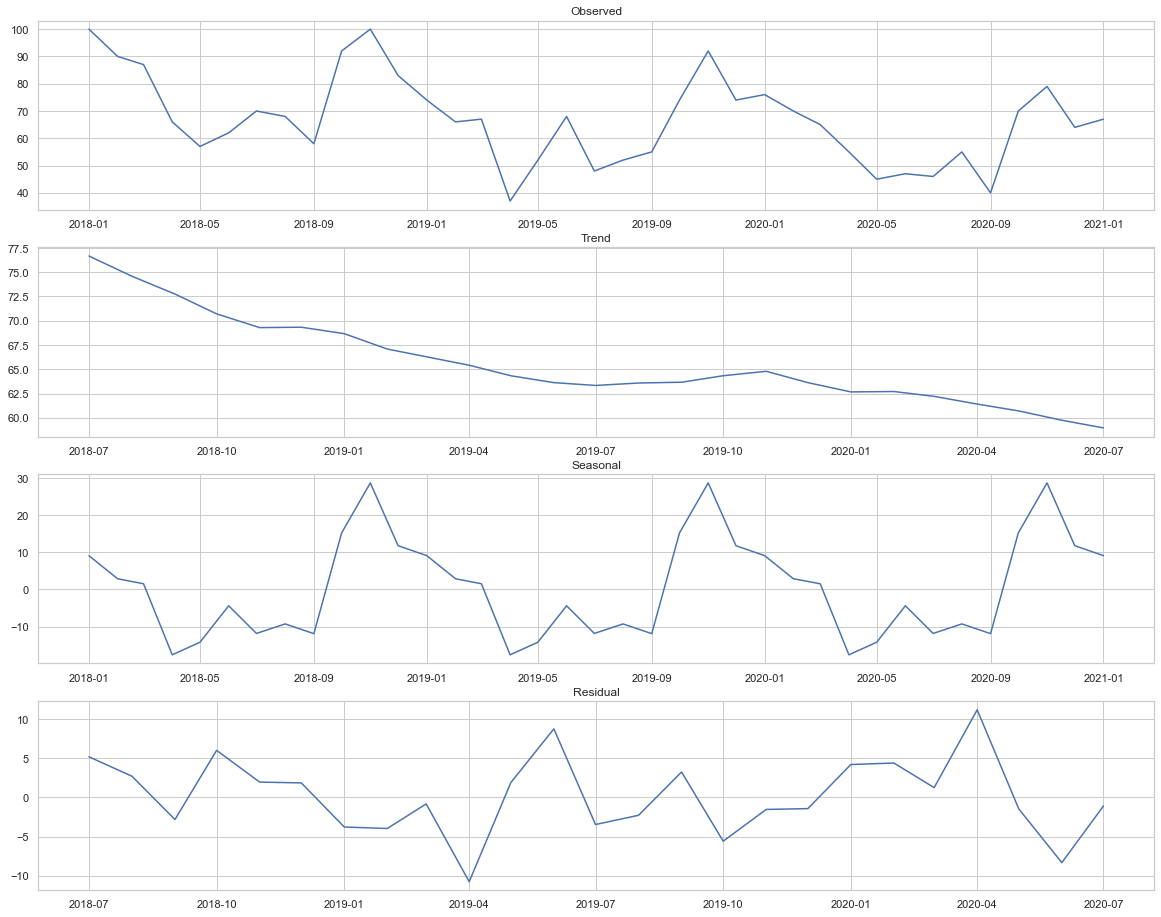

In [319]:
result = seasonal_decompose(df4)
#result.plot()
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')

#plt.tight_layout()
plt.show()



In [668]:

from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df4['Enrollments'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


#here we see that P value is greater than, lets perfrom deifferencing to make this stationary

ADF test statistic: -2.0661208903318444
ADF p-values: 0.2583538903453021
ADF number of lags used: 10
ADF number of observations: 26
ADF critical values: {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}
ADF best information criterion: 200.96205260106774


In [669]:
df_diff = df4.diff().dropna()
#adf_result_diff = adfuller(df_diff['Enrollments'].values)

######################hwever this differencing will beused on ARIMA Model.
#### for Holt winter's we will go by non-stationary data

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_diff['Enrollments'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)



#Here we see that after differencing the data has become stationary

ADF test statistic: -4.33010057254188
ADF p-values: 0.0003938146090268946
ADF number of lags used: 9
ADF number of observations: 26
ADF critical values: {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}
ADF best information criterion: 198.91313613842667


<AxesSubplot:xlabel='Date'>

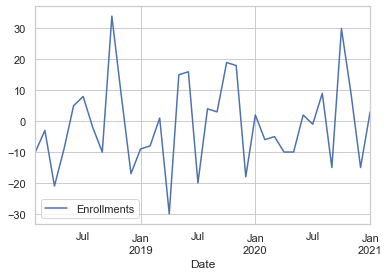

In [670]:
df_diff.plot()

## Holt Winter's ES Model 

In [801]:
train_data = df4[:31]
test_data = df4[31:]

C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


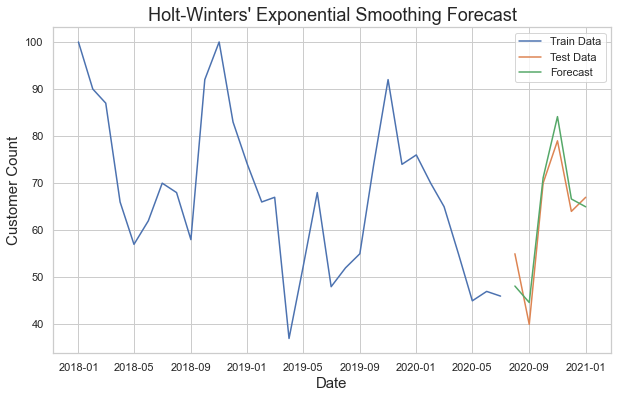

In [802]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Fit Holt-Winters' model
model = ExponentialSmoothing(train_data['Enrollments'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Make predictions
forecast = fitted_model.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Enrollments'], label='Train Data')
plt.plot(test_data.index, test_data['Enrollments'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend()
plt.title("Holt-Winters' Exponential Smoothing Forecast", fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Customer Count', fontsize=15)
plt.show()


## Model Evaluation

In [803]:
np.sqrt(mean_squared_error(test_data["Enrollments"],forecast))

4.230331234675947

In [838]:
test_data.Enrollments.mean(), np.sqrt(test_data.Enrollments.var())

(62.5, 13.516656391282572)

In [ ]:
# as compared to the mean and std dev, our error is highly within one stad ev away from the mean

## Final Model

In [805]:
final_model = ExponentialSmoothing(df4['Enrollments'], trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [806]:
pred = final_model.forecast(12)

In [948]:
pred

2021-02-01    56.482584
2021-03-01    54.149215
2021-04-01    33.815958
2021-05-01    32.482469
2021-06-01    40.149469
2021-07-01    35.815757
2021-08-01    39.482658
2021-09-01    32.149310
2021-10-01    59.815822
2021-11-01    71.482534
2021-12-01    54.816026
2022-01-01    54.688945
Freq: MS, dtype: float64

In [840]:
new_date = [
            "2021-02-01",
            "2021-03-01",
            "2021-04-01",
            "2021-05-01",
            "2021-06-01",
            "2021-07-01",
            "2021-08-01",
            "2021-09-01",
            "2021-10-01",
            "2021-11-01",
            "2021-12-01",
            "2022-01-01"
           ]

In [955]:
Prediction_df = pd.DataFrame(index = pred.index, data = pred.values, columns=["Enrollments"])
                              

In [956]:
Prediction_df

,Enrollments
2021-02-01,56.482584
2021-03-01,54.149215
2021-04-01,33.815958
2021-05-01,32.482469
2021-06-01,40.149469
2021-07-01,35.815757
2021-08-01,39.482658
2021-09-01,32.149310
2021-10-01,59.815822
2021-11-01,71.482534


Text(0.5, 1.0, "Holt-Winters' Exponential Smoothing Forecast")

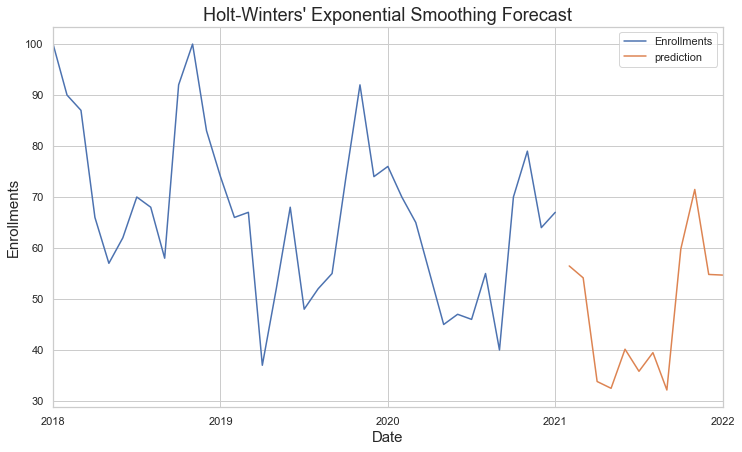

In [822]:
df4.plot(legend=True, label = "Enrollments", figsize=(12,7), y="Enrollments")
pred.plot(legend = True, label="prediction", figsize=(12,7))

plt.xlabel("Date", fontsize=(15))
plt.ylabel("Enrollments", fontsize=(15))
plt.title("Holt-Winters' Exponential Smoothing Forecast", fontsize=18)


### Lets try ARIMA Model

In [824]:
df4.head(20)

,Enrollments
Date,
2018-01-01,100.0
2018-02-01,90.0
2018-03-01,87.0
2018-04-01,66.0
2018-05-01,57.0
2018-06-01,62.0
2018-07-01,70.0
2018-08-01,68.0
2018-09-01,58.0


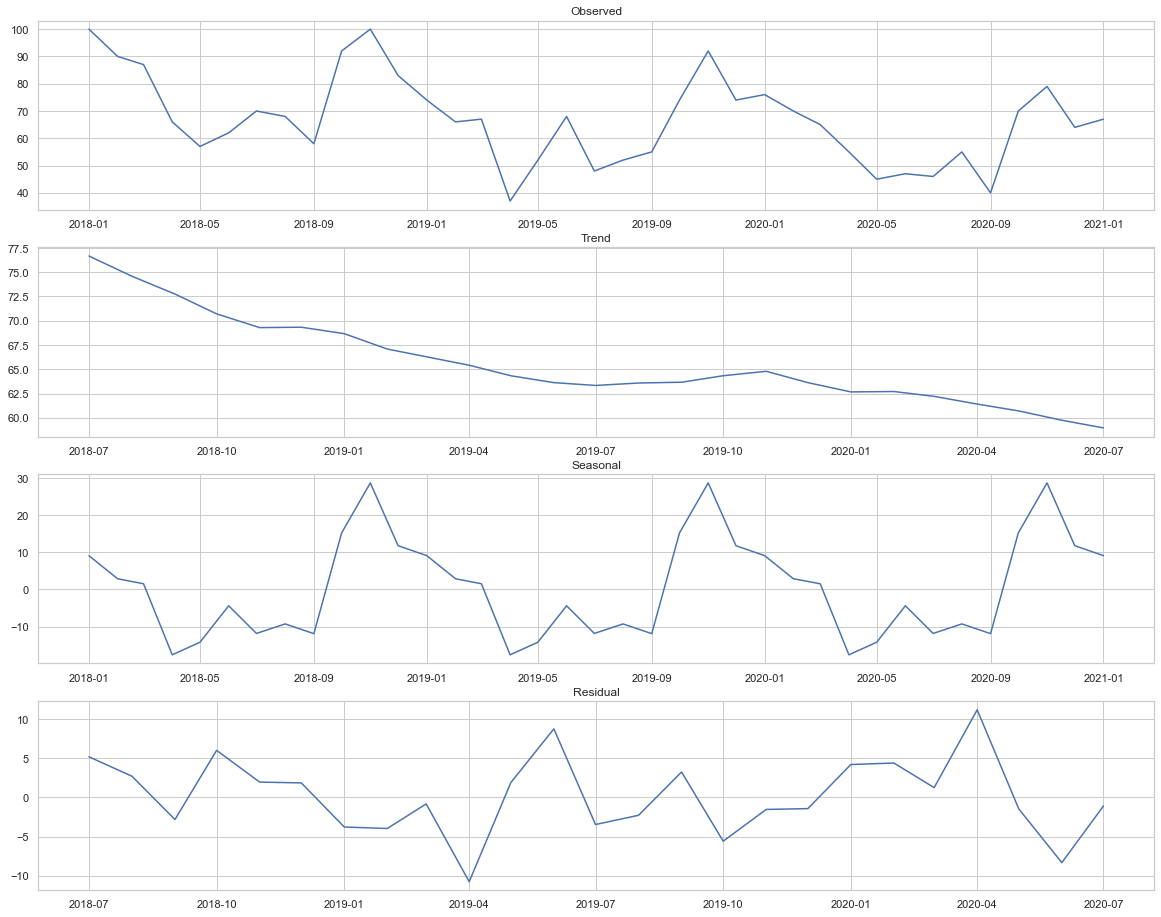

In [375]:
result = seasonal_decompose(df4)
#result.plot()
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')

#plt.tight_layout()
plt.show()



In [829]:
# Split the data into training and testing sets
train_data_arima = df4[:31]
test_data_arima = df4[31:]

### Lets get the p,d,q values

In [858]:
# Split the data into training and testing sets
train_data_arima = df4[:31]
test_data_arima = df4[31:]

In [844]:
#Auto-ARIMA

import itertools

In [845]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [846]:
pdq_combination = list(itertools.product(p,d,q))


In [848]:
len(pdq_combination)

128

In [877]:
rmse = []
order1 = []

In [861]:
import warnings
warnings.filterwarnings("ignore")

In [878]:
for pdq in pdq_combination:
    try:
        model_arima = ARIMA(train_data_arima, order=pdq).fit()
        pred_arima = model_arima.predict(start=len(train_data_arima),end=(len(df4)-1))
        error = np.sqrt(mean_squared_error(test_data_arima,pred_arima))
        #print(error)
        order1.append(pdq)
        rmse.append(error)
        
        
    except:
        continue
        

In [879]:
result =pd.DataFrame(index = order1, data=rmse, columns=["RMSE"])



In [882]:
result.sort_values("RMSE", ascending = True)

#(2,1,6)

,RMSE
"(2, 1, 6)",6.461066
"(7, 1, 6)",8.401342
"(4, 1, 5)",9.028081
"(6, 1, 7)",9.032577
"(6, 1, 6)",9.487149
...,...
"(2, 1, 0)",20.723894
"(4, 1, 0)",20.900624
"(3, 1, 0)",21.243233
"(5, 1, 1)",21.649505


In [830]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(train_data_arima['Enrollments'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


#here we see that P value is greater than, lets perfrom deifferencing to make this stationary

ADF test statistic: -1.7590992549366637
ADF p-values: 0.4009483806521536
ADF number of lags used: 7
ADF number of observations: 23
ADF critical values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
ADF best information criterion: 163.47452663826618


In [831]:
#df_diff = train_data_arima.diff().dropna()

In [832]:

#adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_diff['Enrollments'].values)
#print('ADF test statistic:', adf)
#print('ADF p-values:', pval)
#print('ADF number of lags used:', usedlag)
#print('ADF number of observations:', nobs)
#print('ADF critical values:', crit_vals)
#print('ADF best information criterion:', icbest)

#Here we see that after differencing the data has become stationary

ADF test statistic: -3.622797004842259
ADF p-values: 0.005339859809757911
ADF number of lags used: 5
ADF number of observations: 24
ADF critical values: {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}
ADF best information criterion: 160.76016653641915


<AxesSubplot:xlabel='Date'>

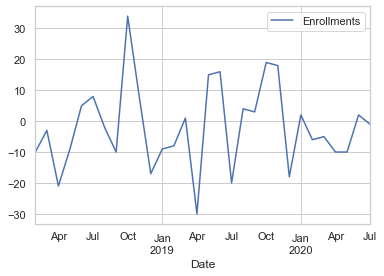

In [833]:
df_diff.plot()

### Model Forecast - graph

In [900]:
model_arima = ARIMA(train_data_arima, order=(2,1,6)).fit()
pred_arima = model_arima.predict(start = len(train_data_arima), end = (len(df4)-1))

In [902]:
np.sqrt(mean_squared_error(test_data_arima,pred_arima))

6.461065897726044

In [904]:
print(np.mean(test_data_arima))
print(np.std(test_data_arima))

Enrollments    62.5
dtype: float64
Enrollments    12.338963
dtype: float64


<AxesSubplot:xlabel='Date'>

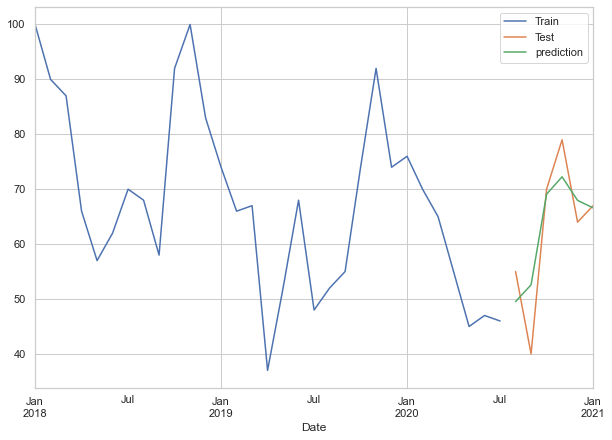

In [901]:
train_data_arima.Enrollments.plot(legend = True, label ="Train", figsize=(10,7))
test_data_arima.Enrollments.plot(legend = True, label ="Test", figsize=(10,7))
pred_arima.plot(legend = True, label ="prediction", figsize=(10,7))


### Predict future data

In [906]:
final_model_arima = ARIMA(df4,order=(2,1,6)).fit()
pred_final_model = final_model_arima.predict(start=len(df4), end=(len(df4)+12))


<AxesSubplot:xlabel='Date'>

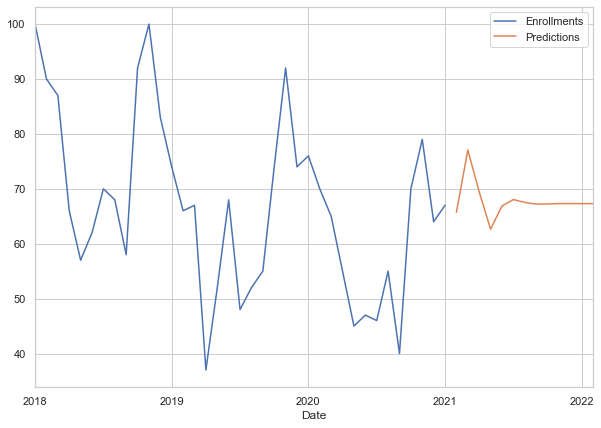

In [907]:
df4.plot(legend = True, label="train", figsize=(10,7))
pred_final_model.plot(legend=True, label="Predictions")

In [908]:
### we know that ARIMA does not capture seasonality properly. Hence we go for SARIMAX

## Lets try SARIMAX Model


In [909]:
import statsmodels.api as sm

In [910]:
train_data_sarimax = train_data_arima
test_data_sarimax =test_data_arima

#### testing on test dataset

In [921]:
model_sarimax = sm.tsa.statespace.SARIMAX(train_data_sarimax, order=(2,1,6), seasonal_order=(2,1,6,12)).fit()


pred_sarimax = model_sarimax.predict(start = len(train_data_sarimax), end=(len(df4)-1))

In [922]:
np.sqrt(mean_squared_error(test_data_sarimax,pred_sarimax))

6.416888182588738

In [923]:
print(np.mean(test_data_sarimax))
print(np.std(test_data_sarimax))

Enrollments    62.5
dtype: float64
Enrollments    12.338963
dtype: float64


Text(0.5, 1.0, 'SARIMAX Model Forecasting')

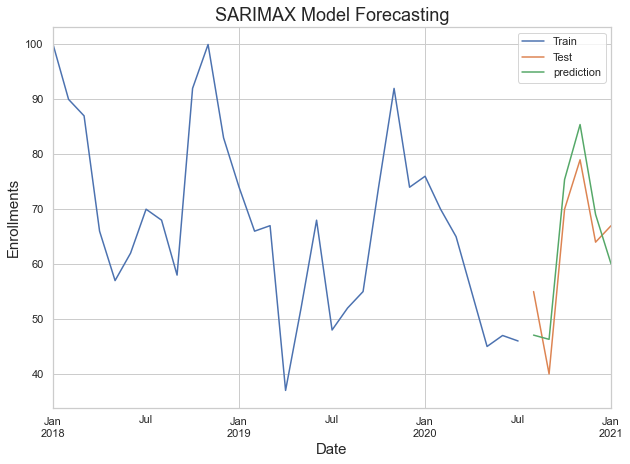

In [929]:
train_data_sarimax.Enrollments.plot(legend = True, label ="Train", figsize=(10,7))
test_data_sarimax.Enrollments.plot(legend = True, label ="Test", figsize=(10,7))
pred_sarimax.plot(legend = True, label ="prediction", figsize=(10,7))


plt.xlabel("Date", fontsize=(15))
plt.ylabel("Enrollments", fontsize=(15))
plt.title("SARIMAX Model Forecasting", fontsize=18)

### Forecasting

In [932]:
final_pred_sarimax = model_sarimax.predict(start=len(df4), end=(len(df4)+11))

Text(0.5, 1.0, 'SARIMAX Model Forecasting')

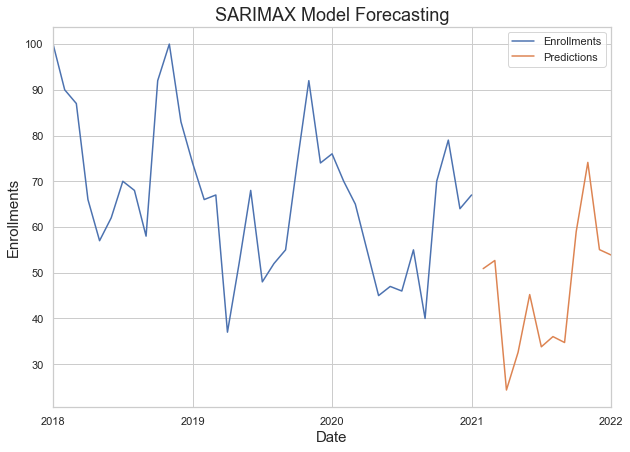

In [933]:
df4.plot(legend = True, label="train", figsize=(10,7))
final_pred_sarimax.plot(legend=True, label="Predictions")




plt.xlabel("Date", fontsize=(15))
plt.ylabel("Enrollments", fontsize=(15))
plt.title("SARIMAX Model Forecasting", fontsize=18)

In [937]:
final_pred_sarimax.values

array([50.8959468 , 52.67641972, 24.35419781, 32.60149784, 45.22262078,
       33.79952348, 36.03289996, 34.73761893, 58.9781373 , 74.1261625 ,
       55.05019838, 53.87568828])

In [957]:
final_pred_sarimax_df = pd.DataFrame(index =final_pred_sarimax.index, data = final_pred_sarimax.values, columns=["Enrollments"]  )

In [961]:
final_pred_sarimax_df.reset_index().rename(columns={"index":"Date"})

,Date,Enrollments
0,2021-02-01,50.895947
1,2021-03-01,52.676420
2,2021-04-01,24.354198
3,2021-05-01,32.601498
4,2021-06-01,45.222621
5,2021-07-01,33.799523
6,2021-08-01,36.032900
7,2021-09-01,34.737619
8,2021-10-01,58.978137
9,2021-11-01,74.126163


### practice

In [972]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(train_data_arima['Enrollments'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


#here we see that P value is greater than, lets perfrom deifferencing to make this stationary

ADF test statistic: -1.7590992549366637
ADF p-values: 0.4009483806521536
ADF number of lags used: 7
ADF number of observations: 23
ADF critical values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
ADF best information criterion: 163.47452663826618


In [983]:
df_diff_practice = train_data_arima.diff().fillna(0)

In [985]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_diff_practice['Enrollments'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


#here we see that P value is greater than, lets perfrom deifferencing to make this stationary

ADF test statistic: -2.975500540269475
ADF p-values: 0.03724655210126194
ADF number of lags used: 9
ADF number of observations: 21
ADF critical values: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
ADF best information criterion: 166.96471371498205


In [975]:
### apply arima, without d component


rmse2 = []
order2 = []

In [984]:
df_diff_practice

,Enrollments
Date,
2018-01-01,0.0
2018-02-01,-10.0
2018-03-01,-3.0
2018-04-01,-21.0
2018-05-01,-9.0
2018-06-01,5.0
2018-07-01,8.0
2018-08-01,-2.0
2018-09-01,-10.0


In [988]:
for pdq in pdq_combination:
    #try:
        model_arima_prac = ARIMA(df_diff_practice, order=pdq).fit()
        pred_arima_prac = model_arima_prac.predict(start=len(df_diff_practice),end=(len(df4)-1))
        error = np.sqrt(mean_squared_error(abs(test_data_arima),abs(pred_arima_prac)))
        #print(error)
        order2.append(pdq)
        rmse2.append(error)
        
        
    #except:
     #   continue
        

LinAlgError: LU decomposition error.

In [ ]:
result2 =pd.DataFrame(index = order2, data=rmse2, columns=["RMSE"])
result2.sort_values("RMSE", ascending = True)


In [837]:
df4.Enrollments.mean(), np.sqrt(df4.Enrollments.var())

(66.78378378378379, 16.184929779024436)

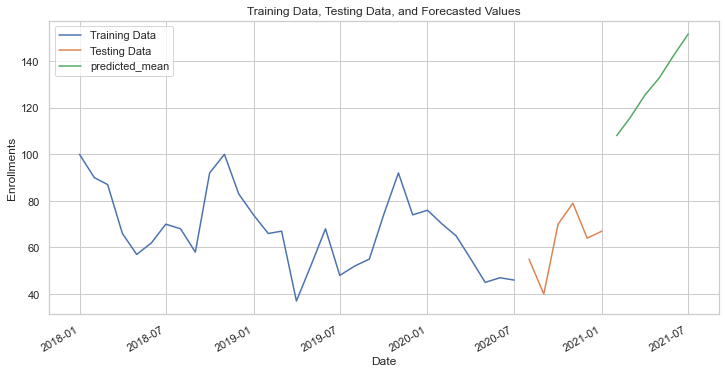

Mean Squared Error (MSE) for Forecast: 23.016546164434658


In [509]:
# Get the forecasted values and standard errors for the next 12 months
forecast = model_fit.forecast(steps=12)

# Perform the back transformation
forecasted_values_original_scale = np.cumsum(forecast) + test_data['Enrollments'].iloc[0]

# Calculate Mean Squared Error (MSE) for the forecast
mse = mean_squared_error(test_data['Enrollments'], forecasted_values_original_scale[:len(test_data)])

# Plot the training data, testing data, fitted values, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Enrollments'], label='Training Data')
plt.plot(test_data.index, test_data['Enrollments'], label='Testing Data')
#plt.plot(test_data.index, forecasted_values_original_scale[len(test_data):12], color='red', label='Forecasted Values')
forecasted_values_original_scale[len(test_data):12].plot()
plt.xlabel('Date')
plt.ylabel('Enrollments')
plt.title('Training Data, Testing Data, and Forecasted Values')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE) for Forecast: {np.sqrt(mse)}")


C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


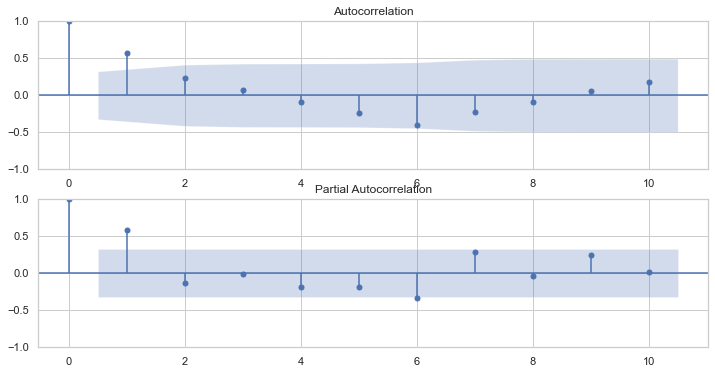

In [513]:
# Plot ACF and PACF to determine p and q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df4['Enrollments'], ax=plt.gca(), lags=10)
plt.subplot(212)
plot_pacf(df4['Enrollments'], ax=plt.gca(), lags=10)
plt.show()



C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


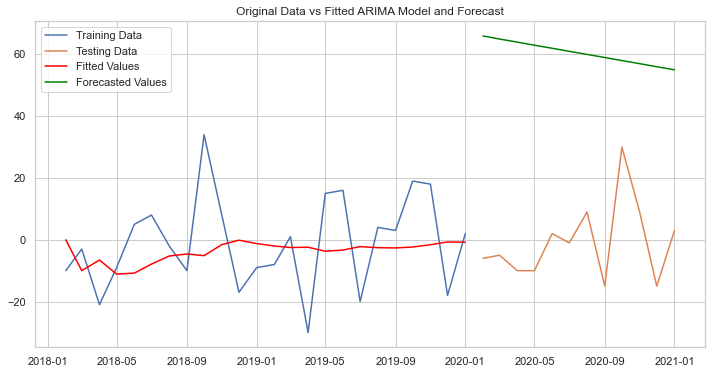

Mean Squared Error (MSE): 3933.79


In [517]:
# Perform differencing to make the data stationary
df_diff = df4.diff().dropna()

# Split data into training and testing sets
train_data = df_diff.iloc[:-12]
test_data = df_diff.iloc[-12:]

# Fit the ARIMA model
model = ARIMA(train_data['Enrollments'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

# Perform the back transformation
forecasted_values_original_scale = np.cumsum(forecast) + df4['Enrollments'].iloc[-1]

# Calculate Mean Squared Error (MSE) for the forecast
mse = mean_squared_error(test_data['Enrollments'], forecasted_values_original_scale)

# Plot the training data, testing data, fitted values, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecasted_values_original_scale, color='green', label='Forecasted Values')
plt.title('Original Data vs Fitted ARIMA Model and Forecast')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.2f}")


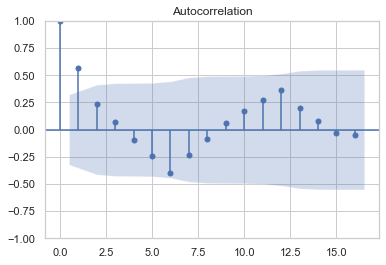

In [514]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df4);

C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


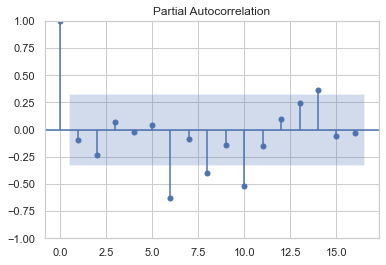

In [381]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff);

### Taking results back to original Scale

C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

                               SARIMAX Results                                
Dep. Variable:            Enrollments   No. Observations:                   36
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -136.109
Date:                Mon, 21 Aug 2023   AIC                            298.218
Time:                        00:12:15   BIC                            318.438
Sample:                    02-01-2018   HQIC                           305.198
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0766      2.185     -0.950      0.342      -6.360       2.207
ar.L2         -2.3296      2.918     -0.798      0.425      -8.049       3.390
ar.L3         -2.0163      2.934     -0.687      0.4

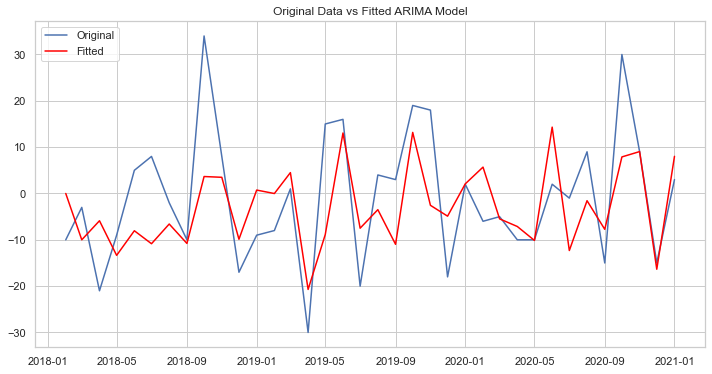

In [409]:
from statsmodels.tsa.arima.model import ARIMA

df_diff = df4.diff().dropna()

#df_diff2 = df_diff.diff().dropna()

model = ARIMA(df_diff["Enrollments"], order=(6, 1, 6))
results_ARIMA = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Original Data vs Fitted ARIMA Model')
plt.legend(['Original', 'Fitted'])
plt.show()



#forecasted_values_original_scale = np.cumsum(model_fit.fittedvalues) + df4["Enrollments"].iloc[-1]
#plt.plot(forecasted_values_original_scale)

In [410]:
ARIMA_diff_prediction = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_prediction.head())

Date
2018-02-01     0.000000
2018-03-01    -9.998147
2018-04-01    -5.886401
2018-05-01   -13.356150
2018-06-01    -8.043266
dtype: float64


In [414]:
ARIMA_diff_prediction_cumsum = ARIMA_diff_prediction.cumsum()
print(ARIMA_diff_prediction_cumsum.head())

Date
2018-02-01     0.000000
2018-03-01    -9.998147
2018-04-01   -15.884548
2018-05-01   -29.240698
2018-06-01   -37.283964
dtype: float64


Text(0.5, 1.0, 'RMSE: nan')

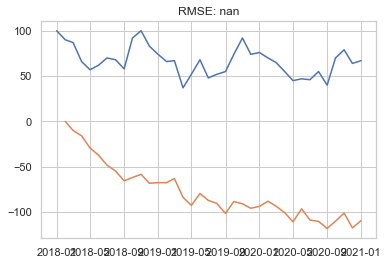

In [416]:
predictions_ARIMA = np.exp(ARIMA_diff_prediction_cumsum)
plt.plot(df4["Enrollments"])
plt.plot(ARIMA_diff_prediction_cumsum)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df4["Enrollments"])**2)/len(df4["Enrollments"])))





In [418]:
np.sqrt(mean_squared_error(ARIMA_diff_prediction_cumsum))

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rida\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

ValueError: zero-dimensional arrays cannot be concatenated

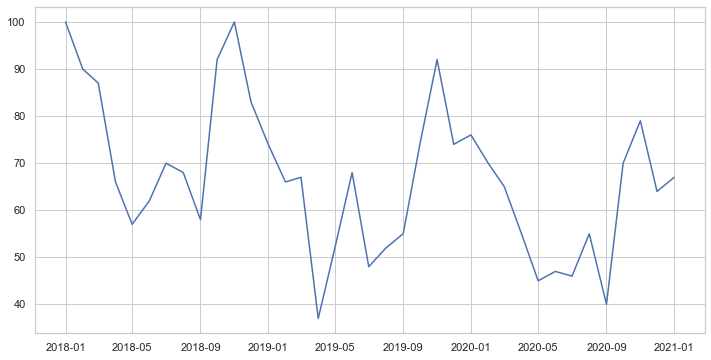

In [406]:
from statsmodels.tsa.arima.model import ARIMA

df_diff = df4.diff().dropna()

model = ARIMA(df_diff["Enrollments"], order=(6, 1, 6))
model_fit = model.fit()

# Get the forecasted values and standard errors
forecast, stderr, conf_int = model_fit.forecast(steps=3)

# Perform the back transformation
forecasted_values_original_scale = np.cumsum(forecast) + df4["Enrollments"].iloc[-1]

# Plot the original data, the fitted values, and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df4["Enrollments"], label='Original Data')
plt.plot(np.concatenate((df4["Enrollments"].iloc[0], model_fit.fittedvalues)), color='red', label='Fitted Values')
plt.plot(np.concatenate((df4["Enrollments"].iloc[0], forecasted_values_original_scale)), color='green', label='Forecasted Values')
plt.title('Original Data, Fitted ARIMA Model, and Forecasted Values')
plt.legend()
plt.show()


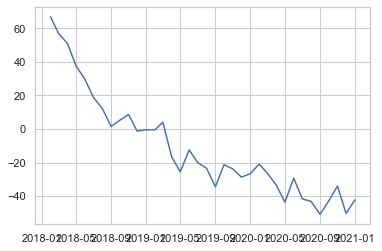

In [400]:
forecasted_values_original_scale = np.cumsum(model_fit.fittedvalues) + df4["Enrollments"].iloc[-1]
plt.plot(forecasted_values_original_scale)



rmse = np.sqrt(mean_squared_error(df4['Enrollments'].iloc[train_size:], forecast_inverted))
                

The End 2

In [608]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


for p in range(5):
    for d in range(2):
        for q in range(5):
            order = (p, d, q)
            try:
                model = ARIMA(train, order=order)
                model_fit = model.fit()
                forecast_steps = len(test)
                forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps, alpha=0.05)
                forecast_inverted = np.cumsum(forecast) + df4['Enrollments'].iloc[train_size - 1]
                rmse = sqrt(mean_squared_error(df4['Enrollments'].iloc[train_size:], forecast_inverted))
                print(f"Order: {order}, RMSE: {rmse}")
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
            except:
                continue

print(best_order)

ADF Statistic: -2.0661208903318444
p-value: 0.2583538903453021


In [602]:
# Fit the best ARIMA model
final_model = ARIMA(train, order=best_order)
final_model_fit = final_model.fit()

# Forecast
forecast_steps = len(test)
forecast, stderr, conf_int = final_model_fit.forecast(steps=forecast_steps, alpha=0.05)
forecast_inverted = np.cumsum(forecast) + df4['Enrollments'].iloc[train_size - 1]

# Calculate RMSE for the final model
final_rmse = sqrt(mean_squared_error(df4['Enrollments'].iloc[train_size:], forecast_inverted))
print("Final Root Mean Squared Error:", final_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df4.index, df4['Enrollments'], label='Actual')
plt.plot(test.index, forecast_inverted, label='Forecast', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.2)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Enrollments')
plt.legend()
plt.show()


TypeError: 'NoneType' object is not subscriptable

#### 5. Show the distribution of when during a customer’s lifecycle a customer leaves Gas South. (The xaxis should be the number of months the customer was with Gas South).

In [ ]:
cust.where((cust.CustomerId==7) | (cust.CustomerId==10)).dropna().head(4)

In [ ]:
prod.where(prod.CustomerId==1).dropna()

customerIDs like 3,7 they only lasted for few months, however, we have their entry in product table as their prodcut end date is given as never ending. for such cases, we need to modify the product table, change the product end date as max of 7th Date in customer's Table 

bu to et the number of month a customer lasted with us, we just need the cust table. We can calculate th  the numbe of months form the date column and then - 1: 37, 7:12....

join the cust and prod - filter the prod table.
remove the rows where the product end date in never ending. 

x: number of months:
y: customer count



how to get the customers who have not left:

the customer whose cut count is 37 and prod end date is never ending:

In [ ]:
cust_new = 

In [89]:
count_df = cust.CustomerId.value_counts().reset_index().dropna()
count_df.columns = ["CustomerId","Count"]

In [91]:
count_df

,CustomerId,Count
0,1,37
1,63,37
2,36,37
3,37,37
4,38,37
...,...,...
3457,2288,1
3458,2284,1
3459,2279,1
3460,2277,1


In [351]:
list_of_cust = count_df.where(count_df.Count==37).dropna().CustomerId

In [322]:
print(list_of_cust.dtype)

float64


All the below customer_ds have never ending date, yet their active months are less than 37

In [353]:
new_df = prod.where(prod.CustomerId.isin(list_of_cust) & (prod.Product_EndDate == '12/31/9999')).dropna()

In [92]:
cust[["CustomerId"]][~cust["CustomerId"].isin(new_df.CustomerId)].groupby(cust.CustomerId).count()


NameError: name 'new_df' is not defined

In [ ]:
### get the customers whose Date = Date.max()

In [144]:
new_df1 = cust.where(cust.Date == cust.Date.max()).dropna()


#new_df1 = cust[cust["Date"] == cust["Date"].max()]["CustomerId"].dropna()

In [273]:
cust.where(cust.CustomerId ==3344).dropna()

,CustomerId,Date
46999,3344.0,2020-12-01


In [297]:
###
my_newdf = pd.merge(cust, new_df_for_now, on = "CustomerId", how = "right")

In [301]:
my_newdf.groupby("Date").count()

,CustomerId,Number of Months
Date,,
2018-01-01,8,8
2018-02-01,6,6
2018-03-01,4,4
2018-04-01,7,7
2018-05-01,8,8
2018-06-01,5,5
2018-07-01,4,4
2018-08-01,3,3
2018-09-01,3,3


In [294]:
new_df_for_now = new_df2.where(new_df2["Number of Months"] == 1).dropna()

In [295]:
new_df_for_now

,CustomerId,Number of Months
8,25.0,1.0
12,34.0,1.0
18,47.0,1.0
19,49.0,1.0
20,53.0,1.0
...,...,...
986,3313.0,1.0
987,3314.0,1.0
988,3329.0,1.0
989,3343.0,1.0


,CustomerId,Number of Months
0,3,32
1,5,23
2,7,12
3,18,4
4,19,30
...,...,...
986,3313,1
987,3314,1
988,3329,1
989,3343,1


In [209]:
new_df2.where(new_df2["Number of Months"] == 1).dropna()

,CustomerId,Number of Months
8,25.0,1.0
12,34.0,1.0
18,47.0,1.0
19,49.0,1.0
20,53.0,1.0
...,...,...
986,3313.0,1.0
987,3314.0,1.0
988,3329.0,1.0
989,3343.0,1.0


In [205]:
new_df2 =cust[["CustomerId"]][~cust["CustomerId"].isin(new_df1.CustomerId)].groupby(cust.CustomerId).count().rename(columns ={"CustomerId": "Number of Months"}).reset_index()


In [191]:
new_df3 = new_df2.groupby('Number of Months').count().rename(columns={'CustomerId':'Count'}).reset_index()

In [192]:
new_df3.head(20)

,Number of Months,Count
0,1,249
1,2,83
2,3,51
3,4,41
4,5,44
5,6,99
6,7,23
7,8,35
8,9,29
9,10,26


In [190]:
len(new_df2.CustomerId.unique())

991

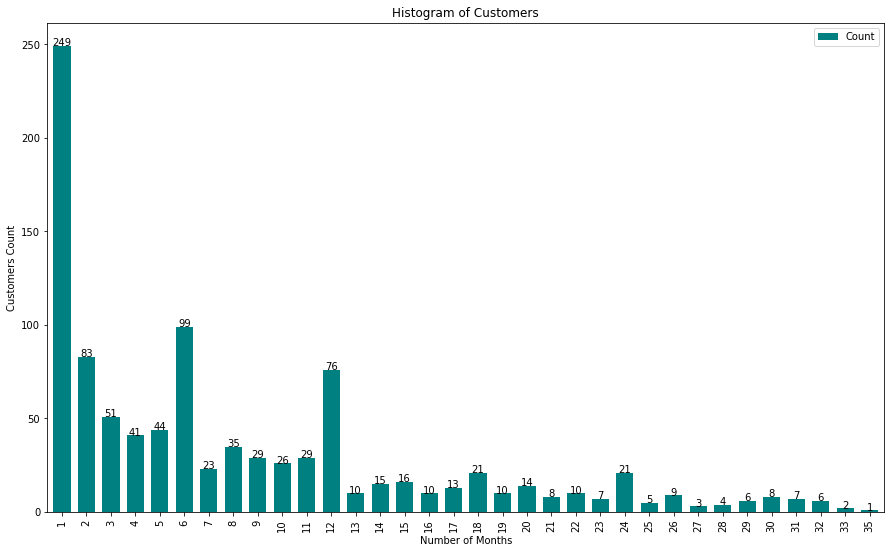

In [224]:
# Create a bar plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

new_df3.plot(kind = 'bar',
            x = "Number of Months",
            y="Count",
            color="teal", 
            figsize=(15,9),
            xlabel ='Number of Months',
            ylabel = 'Customers Count',
            title = 'Histogram of Customers',
            width = 0.7,
            #grid = True
            )


addlabels(new_df3["Number of Months"], new_df3["Count"])
#plot.barh(df1['CustomerId'], df1['Count'], color='blue')
plt.show()

  





In [ ]:
#cust[["CustomerId"]][~cust["CustomerId"].isin(new_df1.CustomerId)].groupby(cust.CustomerId).count()


In [ ]:
#print(cust.where(cust.CustomerId==7).dropna())

In [ ]:
#########

In [ ]:
df1 = cust.groupby("CustomerId").count().reset_index().rename(columns={"Date": "Count"})


In [385]:
df1.where(df1.Count==1).count().dropna()

CustomerId    356
Count         356
dtype: int64

In [421]:
df_new  = df1.groupby("Count").count().reset_index().rename(columns = {"CustomerId" :"Number of Customers",
                                                                       "Count" : "Months"})#.sort_values(by = "CustomerId", ascending = True)
df_new.head()

,Months,Number of Customers
0,1,356
1,2,182
2,3,165
3,4,142
4,5,114


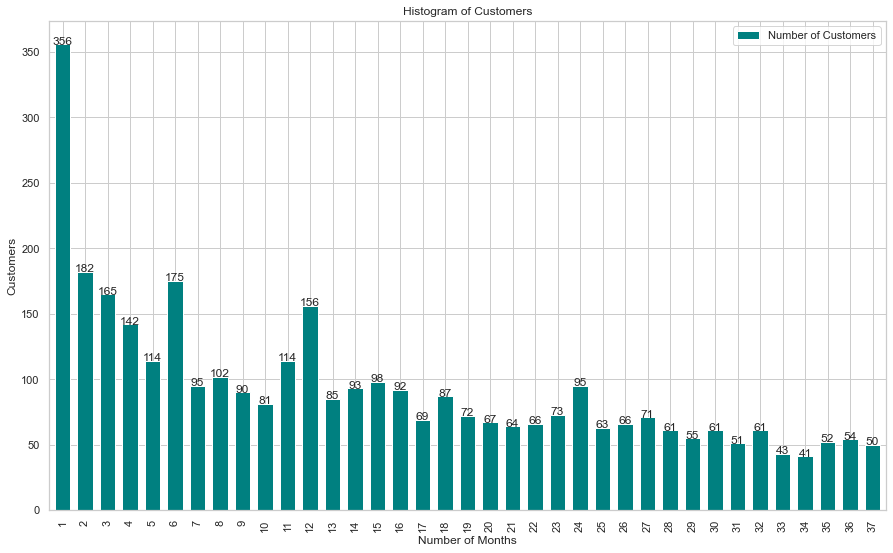

In [469]:
# Create a bar plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df_new.plot(kind = 'bar',
            x = "Months",
            y="Number of Customers",
            color="teal", 
            figsize=(15,9),
            xlabel ='Number of Months',
            ylabel = 'Customers',
            title = 'Histogram of Customers',
            width = 0.7
            )


addlabels(df_new["Months"], df_new["Number of Customers"])
#plot.barh(df1['CustomerId'], df1['Count'], color='blue')
plt.show()

  





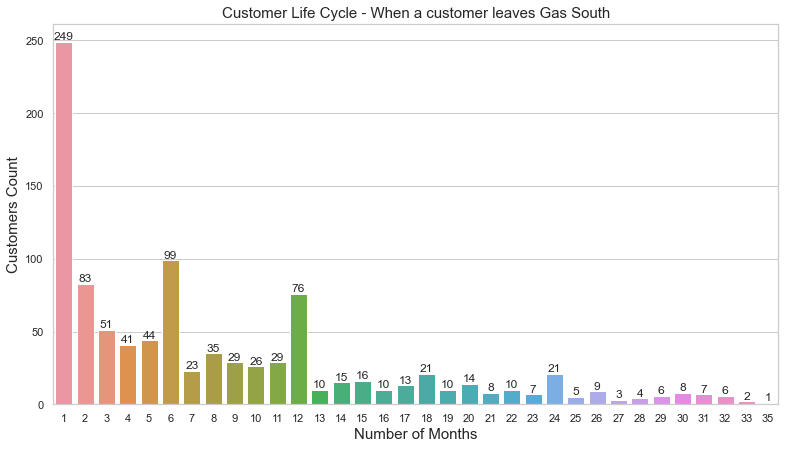

In [947]:

sns.set(style="whitegrid")

# Create a horizontal bar plot using seaborn
plt.figure(figsize=(13,7))
ax = sns.barplot( x="Number of Months", y="Count", data=new_df3)

plt.xlabel('Number of Months', fontsize=15)
plt.ylabel('Customers Count', fontsize=15)
plt.title('Customer Life Cycle - When a customer leaves Gas South', fontsize=15)

ax.bar_label(ax.containers[0])

plt.show()

lets sya a custmer "x" has prdocuct end date less than 9999, but he usedit only for 5 months , bu the poduct table says 30 months...consider this condition also,

In [ ]:
#observation: some cutomers, did not buy product for monhts, because they do no have an end date.
    
    
cust

ARIMA

In [ ]:
###############